## Q1: The stock market

(This is about numba)

A Markov Chain is defined as a sequence of random variables where a parameter depends *only* on the preceding value. This is a crucial tool in statistics, widely used in science and beyond (economics for instance).

For instance, the stock market has phases of growing prices (bull), dreasing prices (bear) and recession. This would be a Markov Chain model:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)

where the numbers on the arrows indicate the probabily that the next day will be in a given state.

Your task is to simulate the stock market according to this rule. Start from a random state and simulate many many  iterations. If your code is right, the fraction of days in each state should converge. 

Implement a pure-python version and a numba version, and compare speeds. 


In [1]:
#STANDARD VERSION NO NUMBA
import random
import numpy as np
from tqdm.notebook import tqdm

iterations=10**7

def cycle(N_iter):

    st_hist   = np.array([0,0,0])
    rand      = np.random.random(N_iter)

    Bull      = np.array([0.9,0.075,0.025])
    Bear      = np.array([0.15,0.8,0.05])
    Stagnant  = np.array([0.25, 0.25, 0.5])
    state     = random.choice([Bull,Bear,Stagnant])


    for n in tqdm(range(N_iter)): 

        if state[0]>=rand[n]:

            state      = Bull
            st_hist[0] += 1

        elif state[1]>=rand[n]-state[0]:

            state      = Bear
            st_hist[1] += 1
        else:
 
            state      = Stagnant
            st_hist[2] += 1


    return st_hist/N_iter

    

%timeit -r 1 -n 1 print(f'Probability of being in [Bull,Bear,Stagnant] after {iterations} iterations=',cycle(iterations))


  0%|          | 0/10000000 [00:00<?, ?it/s]

Probability of being in [Bull,Bear,Stagnant] after 10000000 iterations= [0.6248442 0.3126674 0.0624884]
7.02 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [3]:
#NUMBA VERSION

import random
import numpy as np
from numba import njit
from numba_progress import ProgressBar

iterations=10**7

@njit(nogil=True)
def random_choice(arr):
    idx = np.random.randint(0, len(arr))
    return arr[idx]

@njit(nogil=True)
def numba_cycle(N_iter,progress_proxy):

    st_hist   = np.array([0,0,0])
    rand      = np.random.random(N_iter)

    Bull      = [0.9,0.075,0.025]
    Bear      = [0.15,0.8,0.05]
    Stagnant  = [0.25, 0.25, 0.5]
    st_pool=[Bull,Bear,Stagnant]
    #state     = random_choice(st_pool)
    state=Bull

    for n in range(N_iter): 

        if state[0]>=rand[n]:

            state      = Bull
            st_hist[0] += 1

        elif state[1]>=rand[n]-state[0]:

            state      = Bear
            st_hist[1] += 1

        else:
            
            state      = Stagnant
            st_hist[2] += 1

        progress_proxy.update(1)

    return st_hist/N_iter

    
with ProgressBar(total=iterations ) as progress:
    %timeit -r 1 -n 1 print(f'Probability of being in [Bull,Bear,Stagnant] after {iterations} iterations=',numba_cycle(iterations,progress))
   

  0%|          | 0/10000000 [00:00<?, ?it/s]

Probability of being in [Bull,Bear,Stagnant] after 10000000 iterations= [0.6258496 0.3118178 0.0623326]
422 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Q2: Consistent plotting

(This is about python's dectorators)

Write a decorator for the plots of all your papers. 

- Remember a decorator takes a function. 
- This function in turn should return a matplotlib figure object.
- Before the function is called, the decorator should intialize a matplotlib figure with the options that you like the most (fontsize, ticks, etc etc)
- After the figure it's done, the decorator should save it to pdf.

This is a great hack for your papers! You do this once and for all, and all plots in your paper will be beautifill, all with the same style/fontsize/etc. All you'll need to do is adding `@myplot` to the relevant plotting functions. 
    
The decorator that I use for my papers is available in my python module [skywalker](https://github.com/dgerosa/skywalker).  

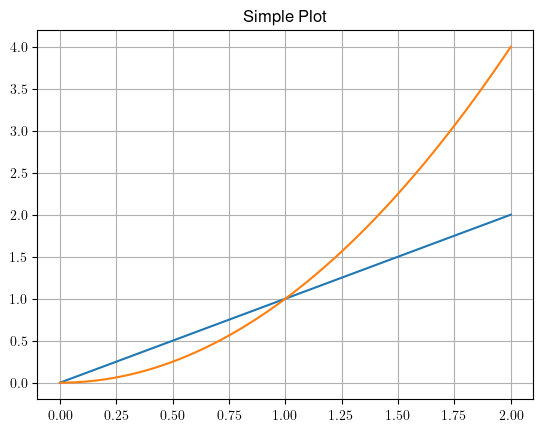

In [4]:

import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def myplot(func):
    def testplot_wrapper():
        
        matplotlib.pyplot.rcParams.update({
                    "text.usetex": True,
                    "font.family": "Helvetica"})
        fig, axs = func()
        axs.grid() 
        matplotlib.rcParams['figure.dpi'] = 600
        axs.set_title("Simple Plot")
       
    return(testplot_wrapper)

@myplot
def plot():
    x = np.linspace(0, 2, 100)
    fig, axs = plt.subplots() 
    axs.plot(x, x, label='linear')
    axs.plot(x, x*x, label='linear') 
    return fig,axs

plot()
plt.show()